In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,StratifiedKFold,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [2]:


app=pd.read_csv("03_app_encoded.csv")

In [3]:
app.head()

,sk_id_curr,target,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,...,organization_type_Transport: type 1,organization_type_Transport: type 2,organization_type_Transport: type 3,organization_type_Transport: type 4,organization_type_University,organization_type_XNA,prev_name_contract_type_Consumer loans,prev_name_contract_type_Revolving loans,prev_name_contract_type_Unknown,prev_name_contract_type_XNA
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,...,False,False,False,False,False,False,True,False,False,False
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,False,False,False,False,False,False,True,False,False,False
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,...,False,False,False,False,False,False,True,False,False,False
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,False,False,False,False,False,False,False,False,False,False
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,False,False,False,False,False,False,False,False,False,False


In [4]:
print(app.columns)


Index(['sk_id_curr', 'target', 'cnt_children', 'amt_income_total',
       'amt_credit', 'amt_annuity', 'amt_goods_price',
       'region_population_relative', 'days_birth', 'days_employed',
       ...
       'organization_type_Transport: type 1',
       'organization_type_Transport: type 2',
       'organization_type_Transport: type 3',
       'organization_type_Transport: type 4', 'organization_type_University',
       'organization_type_XNA', 'prev_name_contract_type_Consumer loans',
       'prev_name_contract_type_Revolving loans',
       'prev_name_contract_type_Unknown', 'prev_name_contract_type_XNA'],
      dtype='object', length=205)


In [5]:
X=app.drop(columns=["target","sk_id_curr"])
y=app["target"]

In [6]:
X

,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,...,organization_type_Transport: type 1,organization_type_Transport: type 2,organization_type_Transport: type 3,organization_type_Transport: type 4,organization_type_University,organization_type_XNA,prev_name_contract_type_Consumer loans,prev_name_contract_type_Revolving loans,prev_name_contract_type_Unknown,prev_name_contract_type_XNA
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,-3648.0,-2120,...,False,False,False,False,False,False,True,False,False,False
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,-1186.0,-291,...,False,False,False,False,False,False,True,False,False,False
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,-4260.0,-2531,...,False,False,False,False,False,False,True,False,False,False
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,-9833.0,-2437,...,False,False,False,False,False,False,False,False,False,False
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,-4311.0,-3458,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,157500.0,254700.0,27558.0,225000.0,0.032561,9327,236,-8456.0,-1982,...,False,False,False,False,False,False,True,False,False,False
307507,0,72000.0,269550.0,12001.5,225000.0,0.025164,20775,0,-4388.0,-4090,...,False,False,False,False,False,True,True,False,False,False
307508,0,153000.0,677664.0,29979.0,585000.0,0.005002,14966,7921,-6737.0,-5150,...,False,False,False,False,False,False,True,False,False,False
307509,0,171000.0,370107.0,20205.0,319500.0,0.005313,11961,4786,-2562.0,-931,...,False,False,False,False,False,False,True,False,False,False


In [7]:
y

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: target, Length: 307511, dtype: int64

In [8]:
y.value_counts()

target
0    282686
1     24825
Name: count, dtype: int64

On sait donc ici qu'on va devoir utiliser stratified kfold ca ron a des classe clairement déséquilibré

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [10]:
model=RandomForestClassifier(n_jobs=-1,n_estimators=100,class_weight="balanced",random_state=42)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9192884899923581

In [11]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_test_pred)
print("Train accuracy:",train_acc)
print("Test accuracy:",test_acc)

Train accuracy: 0.9999756105492504
Test accuracy: 0.9192884899923581


In [12]:
cv=StratifiedKFold(5,shuffle=True,random_state=42)
cross_val_score(model,X_train,y_train,cv=cv,scoring="recall")#score toujours aussi bas que pour scoring=f1

array([0.00025176, 0.00025176, 0.00075529, 0.00075529, 0.00025176])

In [13]:
y_pred=model.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[56535     3]
 [ 4961     4]]


Derniere chose que je vais tenter avant de changer de modéle, c'est la courbe precision_recall pour ajuster par la suite le trehshold de décision

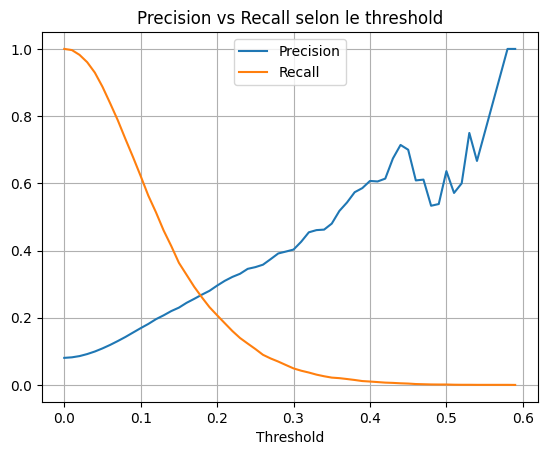

In [14]:
from sklearn.metrics import precision_recall_curve

y_probs = model.predict_proba(X_test)[:,1]  # proba pour la classe 1
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Tu peux ensuite tracer le graphique
import matplotlib.pyplot as plt
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.grid(True)
plt.title("Precision vs Recall selon le threshold")
plt.show()


Même avec un très faible seuil (genre 0.1), le rappel chute rapidement.
Cela signifie que ton modèle prédit très rarement la classe 1, même avec beaucoup de tolérance.
On change donc de modéle.



LightGBM:

In [15]:
!pip install lightgbm

In [16]:
from lightgbm import LGBMClassifier


model = LGBMClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
model.fit(X_train,y_train)
model.score(X_test,y_test)


In [17]:
import re

# Nettoyage global pour X, X_train et X_test
clean_columns = [re.sub(r"[^A-Za-z0-9_]", "_", col) for col in X_train.columns]

X_train.columns = clean_columns
X_test.columns = clean_columns


In [18]:
model1 = LGBMClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
model1.fit(X_train,y_train)
model1.score(X_test,y_test)


[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9624
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 192
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


0.7174121587564835

In [19]:
cv=StratifiedKFold(5,shuffle=True,random_state=42)
cross_val_score(model1,X_train,y_train,cv=cv,scoring='f1')

[LightGBM] [Info] Number of positive: 15888, number of negative: 180918
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9630
[LightGBM] [Info] Number of data points in the train set: 196806, number of used features: 191
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 15888, number of negative: 180918
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9624
[LightGBM] [Info] Number of data points in the train set: 196806, number of used features: 192
[LightGBM] [In

array([0.27709786, 0.28016843, 0.27863107, 0.28002076, 0.27623291])

In [20]:
y_pred = model1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82     56538
           1       0.18      0.68      0.28      4965

    accuracy                           0.72     61503
   macro avg       0.57      0.70      0.55     61503
weighted avg       0.90      0.72      0.78     61503



In [21]:
print(confusion_matrix(y_test, y_pred))

[[40727 15811]
 [ 1569  3396]]


In [22]:
cross_val_score(model1,X_train,y_train,cv=cv,scoring='recall')

[LightGBM] [Info] Number of positive: 15888, number of negative: 180918
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9630
[LightGBM] [Info] Number of data points in the train set: 196806, number of used features: 191
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 15888, number of negative: 180918
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9624
[LightGBM] [Info] Number of data points in the train set: 196806, number of used features: 192
[LightGBM] [In

array([0.67547835, 0.68680765, 0.6805136 , 0.67925478, 0.67900302])

In [23]:
print(confusion_matrix(y_test,y_pred))

[[40727 15811]
 [ 1569  3396]]


on va tester L’AUC-ROC est une métrique qui mesure la capacité d’un modèle à classer correctement les positifs et les négatifs, peu importe le seuil de décision.

In [24]:
from sklearn.metrics import roc_auc_score

# Probabilités de classe 1
y_proba = model1.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_proba)
print(f"AUC : {auc}")


AUC : 0.7717329951636767


Le modèle classe 77 % du temps correctement les clients à risque vs non-risque
Passons maintenant a la roc curve pour savoir quel est le meilleur seuil

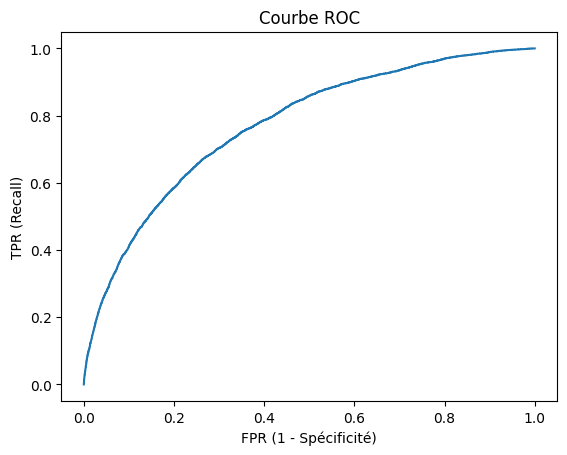

In [25]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr)
plt.xlabel("FPR (1 - Spécificité)")
plt.ylabel("TPR (Recall)")
plt.title("Courbe ROC")
plt.show()


In [26]:
import numpy as np

# Youden's J = TPR - FPR
j_scores = tpr - fpr
best_threshold = thresholds[np.argmax(j_scores)]
print(f"🎯 Meilleur seuil selon Youden's J : {best_threshold:.3f}")


🎯 Meilleur seuil selon Youden's J : 0.508


In [27]:
y_pred_thresh = (y_proba >= best_threshold).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_thresh))


              precision    recall  f1-score   support

           0       0.96      0.73      0.83     56538
           1       0.18      0.68      0.29      4965

    accuracy                           0.73     61503
   macro avg       0.57      0.70      0.56     61503
weighted avg       0.90      0.73      0.79     61503



In [28]:
# 1. Définir le modèle de base
lgbm = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    n_jobs=-1,
    random_state=42
)

# 2. Grille des hyperparamètres
param_grid = {
    'num_leaves': [31],
    'max_depth': [5, -1],
    'learning_rate': [0.05],
    'n_estimators': [100,300],
    'scale_pos_weight': [5, 8]  # pour les classes déséquilibrées
}



# 4. GridSearchCV avec scoring orienté F1 pour prendre en compte les faux négatifs
grid = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring='f1',
    cv=cv,
    verbose=2,
    n_jobs=-1
)



In [29]:
# 5. Entraînement
grid.fit(X_train, y_train)

# 6. Résultats
print("Meilleurs hyperparamètres :", grid.best_params_)
print("Meilleur score F1 :", grid.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9624
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 192
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482
Meilleurs hyperparamètres : {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 300, 'num_leaves': 31, 'scale_pos_weight': 5}
Meilleur score F1 : 0.3139193374577505


In [30]:
grid.best_estimator_

LGBMClassifier(learning_rate=0.05, n_estimators=300, n_jobs=-1,
               objective='binary', random_state=42, scale_pos_weight=5)

In [31]:
new_model=grid.best_estimator_

In [32]:
y_pred = new_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[51502  5036]
 [ 3021  1944]]


In [33]:
from sklearn.metrics import roc_auc_score

# Probabilités de classe 1
y_proba = best_model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_proba)
print(f"AUC : {auc}")


NameError: name 'best_model' is not defined

In [ ]:
!pip install xgboost


In [ ]:
from xgboost import XGBClassifier


# 1. Définir le modèle
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_jobs=-1,
    random_state=42
)

# 2. Grille d’hyperparamètres simple pour démarrer
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5],
    'learning_rate': [0.05],
    'scale_pos_weight': [1, 5]
}

# 3. GridSearchCV
grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',  # Comparer avec LightGBM
    cv=cv,
    verbose=2,
    n_jobs=-1
)




In [ ]:

grid_xgb.fit(X_train,y_train)
best_model = grid_xgb.best_estimator_
y_pred_proba=best_model.predict_proba(X_test)[:, 1]
y_pred=best_model.predict(X_test)


In [ ]:
# 6. Évaluation
print("🔧 Meilleurs hyperparamètres :", grid_xgb.best_params_)
print("✅ AUC Score :", roc_auc_score(y_test, y_pred_proba))
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

Modèle 1 - RandomForestClassifier (baseline)


Modèle 2 - LightGBM (meilleur résultat jusqu'ici)

Modèle 3 - XGBoost (moins performant)


Nous allons donc retourner sur notre modele 2 et essayer de l'améliorer encore.





#modele 2 sur le modele 2, on va essayer 2 choses:
1) retenter lentrainement du modele mais avec en scoring= recall , mais le probleme cest que surement cela aura pour incidence d'augmenter les faux positif , sauf que dans un contexte de credit,
les 2 sont tout suassi important donc le meilleur aurait etait le f1 score sauf que meme comme calaconfusion matrix presente encore beaucoup trop de 
faux positif et faux negatif:

2) Tout simplement créerune métrique scoring qui tiend en compte ce gros déséquilibre de classes

In [59]:
lgbm = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    n_jobs=-1,
    random_state=42
)

# 2. Grille des hyperparamètres
param_grid = {
    'num_leaves': [31],
    'max_depth': [5, -1],
    'learning_rate': [0.05],
    'n_estimators': [100,300],
    'scale_pos_weight': [5, 8]  # pour les classes déséquilibrées
}



# 4. GridSearchCV avec scoring orienté F1 pour prendre en compte les faux négatifs
grid1 = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring='recall',
    cv=cv,
    verbose=2,
    n_jobs=-1
)



In [80]:
grid1=grid1.fit(X_train,y_train)
model_final=grid1.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2543
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482


In [63]:
y_pred=model_final.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[45915 10623]
 [ 2135  2830]]


In [64]:
# Étape 1 : Obtenir les probabilités de classe 1
y_proba = model_final.predict_proba(X_test)[:, 1]

# Étape 2 : Calculer le ROC AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Affichage
print(f"✅ ROC AUC Score final sur données de validation : {auc_score:.4f}")

✅ ROC AUC Score final sur données de validation : 0.7673


Scoring="recall" est donc le Meilleur compromis global car moins de pertes de défauts

On passe à l'étape 2, on sait ce que l'on veut, seulement comment y arriver ? Comment arriver à une confusion matrix quine présente casi aucun erreur
,aucun faux positif et aucun faux négatif .

Tout d'abord Combien d’erreurs peut-on tolérer ? 
 - Rater un défaut (FN) = accorder un crédit à quelqu’un qui ne va pas rembourser représente une perte directe
 - Prédire à tort un défaut (FP) = refuser un bon client représente un manque à gagner, mais pas une perte directe

In [40]:
lgbm = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    n_jobs=-1,
    random_state=42
)

# 2. Grille des hyperparamètres
param_grid = {
    'num_leaves': [31],
    'max_depth': [5, -1],
    'learning_rate': [0.05],
    'n_estimators': [100,300],
    'scale_pos_weight': [5, 8]  # pour les classes déséquilibrées
}



# 4. GridSearchCV avec scoring orienté F1 pour prendre en compte les faux négatifs
grid = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    verbose=2,
    n_jobs=-1
)



In [41]:
grid2=grid.fit(X_train,y_train)
modeltest=grid2.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9624
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 192
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482


In [42]:
print("Best ROC AUC score during CV:", grid2.best_score_)

Best ROC AUC score during CV: 0.7697677095174587


In [45]:
# Étape 1 : Obtenir les probabilités de classe 1
y_proba = modeltest.predict_proba(X_test)[:, 1]

# Étape 2 : Calculer le ROC AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Affichage
print(f"✅ ROC AUC Score final sur données de validation : {auc_score:.4f}")

✅ ROC AUC Score final sur données de validation : 0.7732


In [46]:
y_pred_1=modeltest.predict(X_test)
print(confusion_matrix(y_test,y_pred_1))


[[51502  5036]
 [ 3021  1944]]


On va créer notre propre métrique apres ca on choisira la meilleur metrique et le meilleur modele eton aura casi fini la modelisation.

In [47]:
from sklearn.metrics import make_scorer

def balanced_penalty_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Calcul des taux d'erreur relatifs à chaque classe
    fn_rate = fn / (fn + tp) if (fn + tp) > 0 else 0  # Taux de défauts non détectés
    fp_rate = fp / (fp + tn) if (fp + tn) > 0 else 0  # Taux de bons clients refusés

    # Pondérations automatiques selon taille des classes
    total_0 = tn + fp
    total_1 = fn + tp
    w_fp = total_0 / (total_0 + total_1)
    w_fn = total_1 / (total_0 + total_1)

    # Score final : pénalités pondérées
    penalty = w_fn * fn_rate + w_fp * fp_rate
    return 1 - penalty  # Plus c’est proche de 1, mieux c’est

# Scorer à utiliser dans GridSearchCV
custom_scorer = make_scorer(balanced_penalty_score, greater_is_better=True)



In [48]:
lgbm = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    n_jobs=-1,
    random_state=42
)

# 2. Grille des hyperparamètres
param_grid = {
    'num_leaves': [31],
    'max_depth': [5, -1],
    'learning_rate': [0.05],
    'n_estimators': [100,300],
    'scale_pos_weight': [5, 8]  # pour les classes déséquilibrées
}



# 4. GridSearchCV avec scoring orienté F1 pour prendre en compte les faux négatifs
grid = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring= custom_scorer,#metrique quon vient de tester
    cv=cv,
    verbose=2,
    n_jobs=-1
)



In [49]:
grid3=grid.fit(X_train,y_train)
modelfinal=grid3.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9624
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 192
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

In [50]:
print("Best ROC AUC score during CV:", modelfinal.best_score_)

Best ROC AUC score during CV: defaultdict(<class 'collections.OrderedDict'>, {})


In [51]:
y_pred_2=modelfinal.predict(X_test)
print(confusion_matrix(y_test,y_pred_2))

[[52356  4182]
 [ 3267  1698]]


In [52]:
# Étape 1 : Obtenir les probabilités de classe 1
y_proba = modelfinal.predict_proba(X_test)[:, 1]

# Étape 2 : Calculer le ROC AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Affichage
print(f"✅ ROC AUC Score final sur données de validation : {auc_score:.4f}")

✅ ROC AUC Score final sur données de validation : 0.7641


In [53]:
#2 eme metrique:*
def penalize_faux_negatifs(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    fn_rate = fn / (fn + tp) if (fn + tp) > 0 else 0
    fp_rate = fp / (fp + tn) if (fp + tn) > 0 else 0

    # 🧠 Ici on FORCEMENT un poids fort sur les FN
    w_fn = 0.8   # défauts non détectés (très grave)
    w_fp = 0.2   # bons clients refusés (moins grave ici)

    penalty = w_fn * fn_rate + w_fp * fp_rate
    return 1 - penalty


In [54]:
# Scorer à utiliser dans GridSearchCV
custom_scorer2 = make_scorer(balanced_penalty_score, greater_is_better=True)

In [55]:
lgbm = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    n_jobs=-1,
    random_state=42
)

# 2. Grille des hyperparamètres
param_grid = {
    'num_leaves': [31],
    'max_depth': [5, -1],
    'learning_rate': [0.05],
    'n_estimators': [100,300],
    'scale_pos_weight': [5, 8]  # pour les classes déséquilibrées
}



# 4. GridSearchCV avec scoring orienté F1 pour prendre en compte les faux négatifs
grid = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring= custom_scorer2,#metrique quon vient de tester
    cv=cv,
    verbose=2,
    n_jobs=-1
)



In [56]:
grid4=grid.fit(X_train,y_train)
modelBeta=grid4.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9624
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 192
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

In [57]:
y_pred_3=modelfinal.predict(X_test)
print(confusion_matrix(y_test,y_pred_3))

[[52356  4182]
 [ 3267  1698]]


In [58]:
# Étape 1 : Obtenir les probabilités de classe 1
y_proba = modelfinal.predict_proba(X_test)[:, 1]

# Étape 2 : Calculer le ROC AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Affichage
print(f"✅ ROC AUC Score final sur données de validation : {auc_score:.4f}")

✅ ROC AUC Score final sur données de validation : 0.7641


In [ ]:
Le meilleur model est donc celui avec la metrique recall!

In [65]:
import joblib

# Sauvegarde du modèle entraîné
joblib.dump(model_final, "model_final_recall.pkl")

print("✅ Modèle sauvegardé dans le fichier : model_final_recall.pkl")


✅ Modèle sauvegardé dans le fichier : model_final_recall.pkl


In [67]:
X_train.columns

Index(['cnt_children', 'amt_income_total', 'amt_credit', 'amt_annuity',
       'amt_goods_price', 'region_population_relative', 'days_birth',
       'days_employed', 'days_registration', 'days_id_publish',
       ...
       'organization_type_Transport__type_1',
       'organization_type_Transport__type_2',
       'organization_type_Transport__type_3',
       'organization_type_Transport__type_4', 'organization_type_University',
       'organization_type_XNA', 'prev_name_contract_type_Consumer_loans',
       'prev_name_contract_type_Revolving_loans',
       'prev_name_contract_type_Unknown', 'prev_name_contract_type_XNA'],
      dtype='object', length=203)

on veut pour notre application sur streamlit, les entrees ue lutilisateur pourra choisir,pour cela je vais faire ca afin davoirlesfeatures importantes

In [68]:
importances = model_final.feature_importances_
features = X_train.columns

feat_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Affiche les 10 premières
print(feat_importance.head(10))


                   Feature  Importance
26            ext_source_1         214
28            ext_source_3         172
27            ext_source_2         170
2               amt_credit         161
6               days_birth         141
3              amt_annuity         135
7            days_employed         107
70    inst_amt_payment_sum          94
4          amt_goods_price          93
72  inst_payment_diff_mean          91


le probleme cest ue le modele a etait entraine sur les 203 valeurs donc on peut pas faire streamlit ue sur les 10 colonnes cava mettre messages derreurs

In [69]:
selected_features = [
    'ext_source_1', 'ext_source_2', 'ext_source_3',
    'amt_credit', 'days_birth', 'amt_annuity',
    'days_employed', 'inst_amt_payment_sum',
    'amt_goods_price', 'inst_payment_diff_mean'
]


In [70]:
df = pd.read_csv("03_app_encoded.csv")


In [71]:
X = df[selected_features]
y = df['target']

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [73]:
model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015804 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2543
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482


LGBMClassifier(random_state=42)

In [75]:
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.58      0.01      0.03      4965

    accuracy                           0.92     61503
   macro avg       0.75      0.51      0.49     61503
weighted avg       0.89      0.92      0.88     61503



In [76]:
print(confusion_matrix(y_test,y_pred))

[[56488    50]
 [ 4895    70]]


In [77]:
lgbm = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    n_jobs=-1,
    random_state=42
)

# 2. Grille des hyperparamètres
param_grid = {
    'num_leaves': [31],
    'max_depth': [5, -1],
    'learning_rate': [0.05],
    'n_estimators': [100,300],
    'scale_pos_weight': [5, 8]  # pour les classes déséquilibrées
}



# 4. GridSearchCV avec scoring orienté F1 pour prendre en compte les faux négatifs
grid = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring= custom_scorer,#metrique quon vient de tester
    cv=cv,
    verbose=2,
    n_jobs=-1
)


In [78]:
grid10=grid.fit(X_train,y_train)
model10=grid10.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013783 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2543
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [79]:
y_pred10=model10.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[56488    50]
 [ 4895    70]]


Tu as un excellent modèle offline (203 features) 

Mais dans Streamlit, tu ne peux pas demander 203 infos à un humain 

Et si tu réentraînes un modèle avec 10 features, tu perds en performance, comme tu l’as vu dans ta confusion matrix 


Comment déployer un modèle performant (entraîné sur 203 features) alors qu’on ne peut demander à l’utilisateur de remplir que 10 champs dans Streamlit ?

on va Garder notre modèle LightGBM entraîné sur les 203 colonnes et faire en sorte qu’il fonctionne en production avec ton Streamlit.
or, on ne peux pas demander à l’utilisateur 203 champs dans Streamlit. donc on va demander à l’utilisateur 10 à 15 variables,
et compléter les 193 autres automatiquement par des valeurs moyennes puis recréer le même format d’entrée (203 colonnes) que celui du .pkl

rdv sur 06_deploiement_streamlit.ipynb
